# Liniendiagramm

Dieses Notizbuch zeigt, wie man ein einfaches Liniendiagramm mit Pythons `matplotlib` erstellt. Wir beginnen mit Beispieldaten und zeigen Ihnen dann, wie Sie Ihren eigenen Datensatz laden und visualisieren können.

## 1. Grundlegendes Liniendiagramm

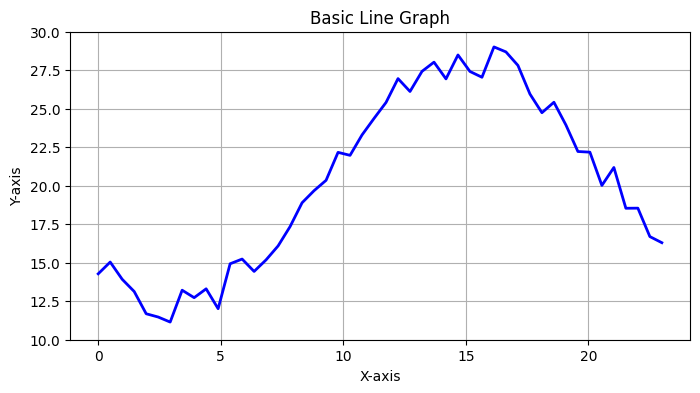

In [1]:
# Schritt 1: Python Libraries importieren
import matplotlib.pyplot as plt
import numpy as np

# Schritt 2: Beispieldaten erstellen
x = np.linspace(0, 23, 2*24)

np.random.seed(42)
noise = np.random.uniform(-1, 1.5, size=x.shape)
y = 20 + 8 * np.sin((x - 9) * np.pi / 12) + noise

# Schritt 3: Plotten des grundlegenden Liniendiagramms
plt.figure(figsize=(8, 4))
plt.plot(x, y, label='sin(x)', color='blue', linewidth=2)
plt.title('Basic Line Graph')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.ylim(10,30)
plt.grid(True)
plt.show()


## 2. Liniendiagramm mit CDS-Datensatz

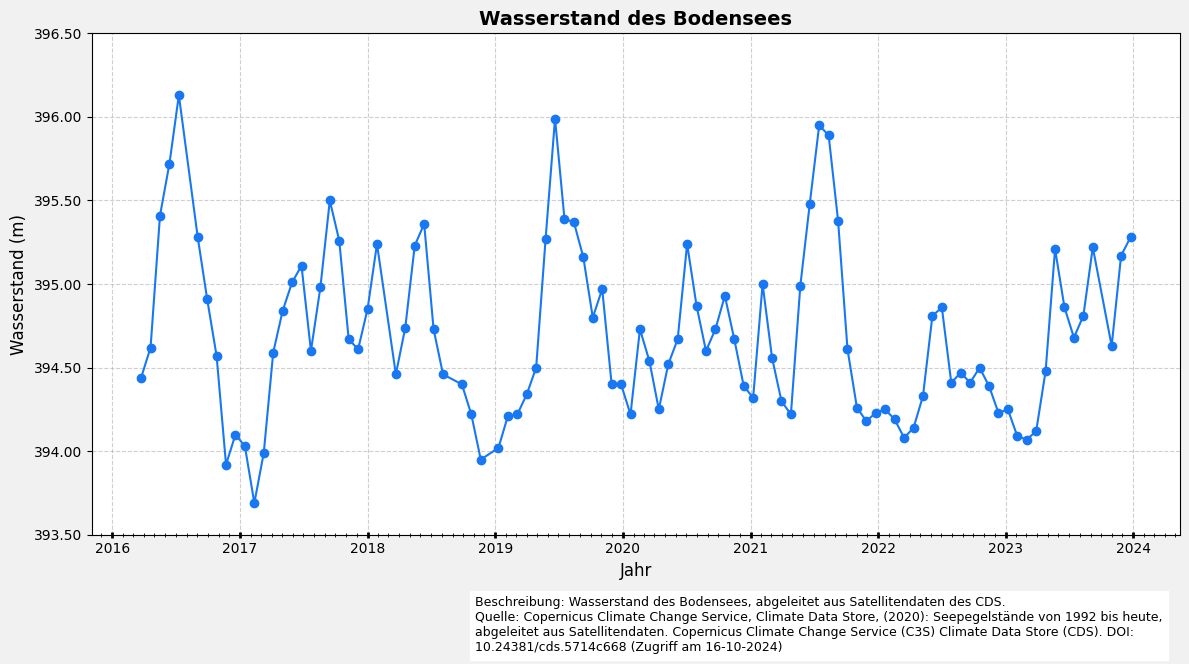

In [7]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, YearLocator, MonthLocator
import matplotlib.ticker as ticker

# Lese die CSV-Datei mit Datums-Parsing
csv_filepath = f"./data/satellite-lake-water-level.csv"
dataframe = pd.read_csv(csv_filepath, parse_dates=['time'], index_col='time')

# Erstelle die Figur und Achsen
fig, ax = plt.subplots(figsize=(12, 6), facecolor='#f1f1f1', edgecolor='k')

# Plotten der Wasserstandsdaten
ax.plot(
    dataframe.index,
    dataframe['water_surface_height_above_reference_datum'],
    marker='o',
    linestyle='-',
    color='#1877F2',
    label="Wasserstand",
)

# Formatieren der x-Achse für bessere Lesbarkeit
ax.xaxis.set_major_locator(YearLocator())  # Haupt-Ticks für jedes Jahr
ax.xaxis.set_minor_locator(MonthLocator())  # Kleine Ticks für jeden Monat
ax.xaxis.set_major_formatter(DateFormatter('%Y')) 
ax.tick_params(axis='x', which='major', length=4, direction='inout', width=2)
ax.tick_params(axis='x', which='minor', length=3, direction='inout')

# Setzen der y-Achsen-Grenzen
ax.set_ylim(393.5, 396.5)

# Setzen der Achsenbeschriftungen und Titel des Diagramms
ax.set_xlabel('Jahr', fontsize=12)
ax.set_ylabel('Wasserstand (m)', fontsize=12)
ax.set_title('Wasserstand des Bodensees', fontsize=14, fontweight='bold')

# Hinzufügen eines Rasters zum Diagramm und Formatierung der y-Achse
ax.grid(visible=True, color='#b0b0b0', linestyle='--', linewidth=0.8, alpha=0.6)
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%0.2f'))

# Hinzufügen einer Beschreibung und Quelleninformation
plt.figtext(
    0.4,
    -0.05,
    (
        'Beschreibung: Wasserstand des Bodensees, abgeleitet aus Satellitendaten des CDS.\n'
        'Quelle: Copernicus Climate Change Service, Climate Data Store, (2020): Seepegelstände von 1992 '
        'bis heute, abgeleitet aus Satellitendaten. Copernicus Climate Change Service (C3S) Climate Data '
        'Store (CDS). DOI: 10.24381/cds.5714c668 (Zugriff am 16-10-2024)'
    ),
    ha='left',
    va='center',
    fontsize=9,
    wrap=True,
    backgroundcolor='w',
)

# Layout anpassen und das Diagramm anzeigen
plt.tight_layout()
plt.show()